Import Necessary Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset loader

In [2]:
df = pd.read_csv("Dataset_spine.csv")

In [3]:
df.head()

Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12 Class_att  \
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  Abnormal   
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  Abnormal   
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  Abnormal   
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  Abnormal   
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

Data Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Col1         310 non-null    float64
 1   Col2         310 non-null    float64
 2   Col3         310 non-null    float64
 3   Col4         310 non-null    float64
 4   Col5         310 non-null    float64
 5   Col6         310 non-null    float64
 6   Col7         310 non-null    float64
 7   Col8         310 non-null    float64
 8   Col9         310 non-null    float64
 9   Col10        310 non-null    float64
 10  Col11        310 non-null    float64
 11  Col12        310 non-null    float64
 12  Class_att    310 non-null    object 
 13  Unnamed: 13  14 non-null     object 
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [5]:
print(df["Unnamed: 13"].dropna().values)

['Prediction is done by using binary classification.'
 'Attribute1  = pelvic_incidence  (numeric) '
 'Attribute2 = pelvic_tilt (numeric) '
 'Attribute3 = lumbar_lordosis_angle (numeric) '
 'Attribute4 = sacral_slope (numeric) '
 'Attribute5 = pelvic_radius (numeric) '
 'Attribute6 = degree_spondylolisthesis (numeric) '
 ' Attribute7= pelvic_slope(numeric)' ' Attribute8= Direct_tilt(numeric)'
 ' Attribute9= thoracic_slope(numeric)'
 ' Attribute10= cervical_tilt(numeric)'
 ' Attribute11=sacrum_angle(numeric)'
 ' Attribute12= scoliosis_slope(numeric)'
 'Attribute class {Abnormal, Normal} ']


In [6]:
column_values = df["Unnamed: 13"].dropna().values
# Initialize a list to store lines containing the "=" sign
lines_with_equals_sign = []

# Iterate over the values of the column and split the data
for line in column_values:
    if "=" in line:
        # Split the line at "=", and take the part after it
        data = line.split("=")[1].strip()
       # Split again at "(" to remove any content within parentheses
        data_without_parentheses = data.split("(")[0].strip()
        # Append the processed data to the list
        lines_with_equals_sign.append(data_without_parentheses)

# Print the lines containing "=" sign
for line in lines_with_equals_sign:
    print(line)

pelvic_incidence
pelvic_tilt
lumbar_lordosis_angle
sacral_slope
pelvic_radius
degree_spondylolisthesis
pelvic_slope
Direct_tilt
thoracic_slope
cervical_tilt
sacrum_angle
scoliosis_slope


In [7]:
# Rename the columns before "class_att" column accordingly
for i, data in enumerate(lines_with_equals_sign):
    if i < len(df.columns) - 1:  # Check if it's before "class_att" column
        df.rename(columns={df.columns[i]: data}, inplace=True)

df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope Class_att  \
0         14.5386       15.30468    -28.658501          43.5123  Abnormal   
1         17.5323       16.78486    -25.530607          16.1102  Abnormal   
2         17.4861       16.65897    -29.031888          19.2221  Abnormal   
3         12.7074       11.42447    -30.470246          18.8329  Abnormal   
4         15.9546        8.87237    -16.378376          24.9171  Abnormal   

                                         Unnamed: 13  
0                                                NaN  
1                                                NaN  
2  Prediction is done by using binary classificat...  
3                                                NaN  
4                                                NaN

Drop unnamed column, and renamed the last column name to State

In [8]:
# Rename "Class_att" column to "State"
df.rename(columns={"Class_att": "State"}, inplace=True)

# Drop the "Unnamed: 13" column
df.drop(columns=["Unnamed: 13"], inplace=True)

df.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027817    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0      98.672917                 -0.254400      0.744503      12.5661   
1     114.405425                  4.564259      0.415186      12.8874   
2     105.985135                 -3.530317      0.474889      26.8343   
3     101.868495                 11.211523      0.369345      23.5603   
4     108.168725                  7.918501      0.543360      35.4940   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope     State  
0         14.5386       15.30468    -28.658501          43.5123  Abnormal  
1         17.5323       16.78486    -25.530607          16.1102  Abnormal  
2         17.4861       16.65897    -29.031888          19.2221  Abnormal  
3         12.7074       11.42447    -30.470246          18.8329  Abnormal  
4         15.9546        8.87237    -16.378376          24.9171  Abnormal

In [9]:
df.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean          60.496653    17.542822              51.930930     42.953831   
std           17.236520    10.008330              18.554064     13.423102   
min           26.147921    -6.554948              14.000000     13.366931   
25%           46.430294    10.667069              37.000000     33.347122   
50%           58.691038    16.357689              49.562398     42.404912   
75%           72.877696    22.120395              63.000000     52.695888   
max          129.834041    49.431864             125.742385    121.429566   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean      117.920655                 26.296694      0.472979    21.321526   
std        13.317377                 37.559027      0.285787     8.639423   
min        70.082575                -11.058179      0.003220     7.027000   
25%       110.709196                  1.603727      0.224367    13.054400   
50%       118.268178                 11.767934      0.475989    21.907150   
75%       125.467674                 41.287352      0.704846    28.954075   
max       163.071041                418.543082      0.998827    36.743900   

       thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
count      310.000000     310.000000    310.000000       310.000000  
mean        13.064511      11.933317    -14.053139        25.645981  
std          3.399713       2.893265     12.225582        10.450558  
min          7.037800       7.030600    -35.287375         7.007900  
25%         10.417800       9.541140    -24.289522        17.189075  
50%         12.938450      11.953835    -14.622856        24.931950  
75%         15.889525      14.371810     -3.497094        33.979600  
max         19.324000      16.821080      6.972071        44.341200

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  State                     310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


In [11]:
print (df.isnull().sum())

pelvic_incidence            0
pelvic_tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
sacrum_angle                0
scoliosis_slope             0
State                       0
dtype: int64


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Extract column names
columns_to_scale = df.columns

# Remove any non-numeric columns if necessary
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Select the columns and perform MinMaxScaler
X = df[numeric_columns]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data=scaled_data, columns=numeric_columns)
scaled_df.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0       0.307461                  0.025148      0.744554     0.186396   
1       0.476649                  0.036365      0.413783     0.197208   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0        0.610506       0.845115      0.156861         0.977797  
1        0.854170       0.996300      0.230878         0.243812

In [13]:
y=df['State']
df=scaled_df.join(y)
df.head(2)

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
0       0.307461                  0.025148      0.744554     0.186396   
1       0.476649                  0.036365      0.413783     0.197208   

   thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope     State  
0        0.610506       0.845115      0.156861         0.977797  Abnormal  
1        0.854170       0.996300      0.230878         0.243812  Abnormal

In [14]:
df['State'].value_counts()

Abnormal    210
Normal      100
Name: State, dtype: int64

Exploratory Data Analysis

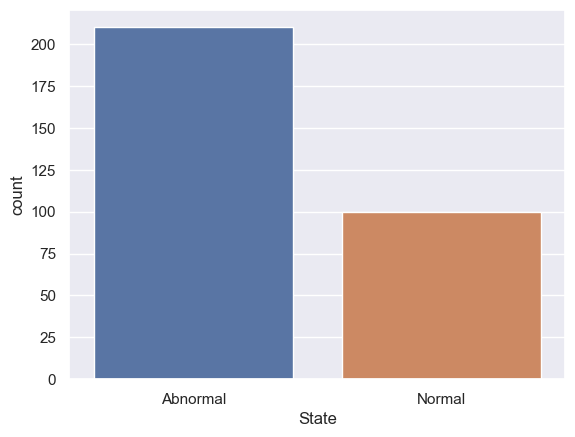

In [15]:
sns.set()
sns.countplot(x = "State",data=df)
plt.show()

In [16]:
df['State'].value_counts()*100.0 /len(df)

Abnormal    67.741935
Normal      32.258065
Name: State, dtype: float64

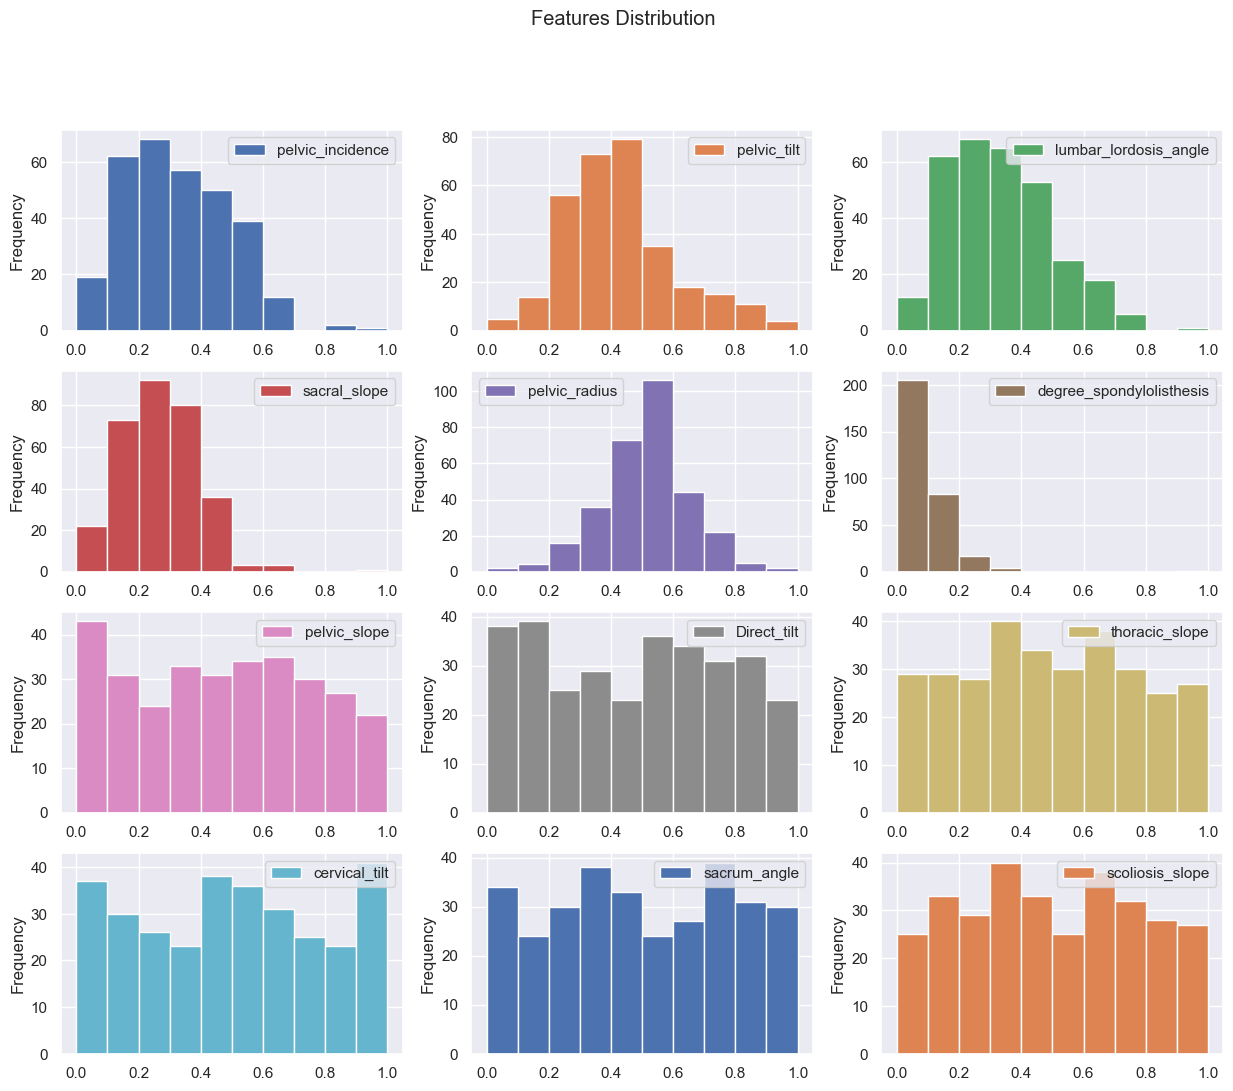

In [17]:
sns.set_theme(style='darkgrid')
df.plot(kind='hist', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12),title = "Features Distribution")
plt.show()

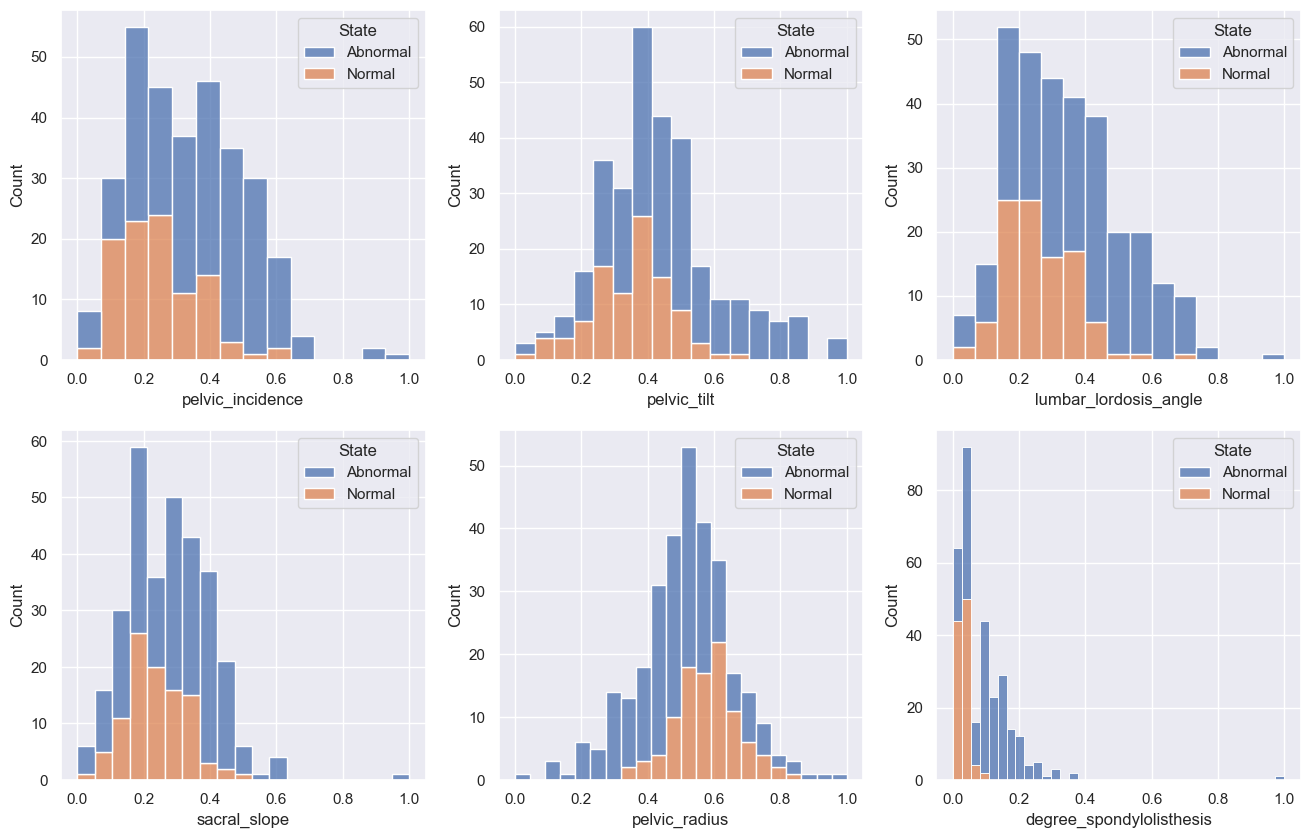

In [18]:
sns.set_theme(style='darkgrid')
fig, ax = plt.subplots(2,3,figsize=(16,10))
sns.histplot(data=df,x='pelvic_incidence', hue='State', multiple="stack", ax=ax[0][0])
sns.histplot(data=df,x='pelvic_tilt', hue='State', multiple="stack", ax=ax[0][1])
sns.histplot(data=df,x='lumbar_lordosis_angle', hue='State', multiple="stack", ax=ax[0][2])
sns.histplot(data=df,x='sacral_slope', hue='State', multiple="stack", ax=ax[1][0]) 
sns.histplot(data=df,x='pelvic_radius', hue='State', multiple="stack", ax=ax[1][1])
sns.histplot(data=df,x='degree_spondylolisthesis', hue='State', multiple="stack", ax=ax[1][2])
plt.show()

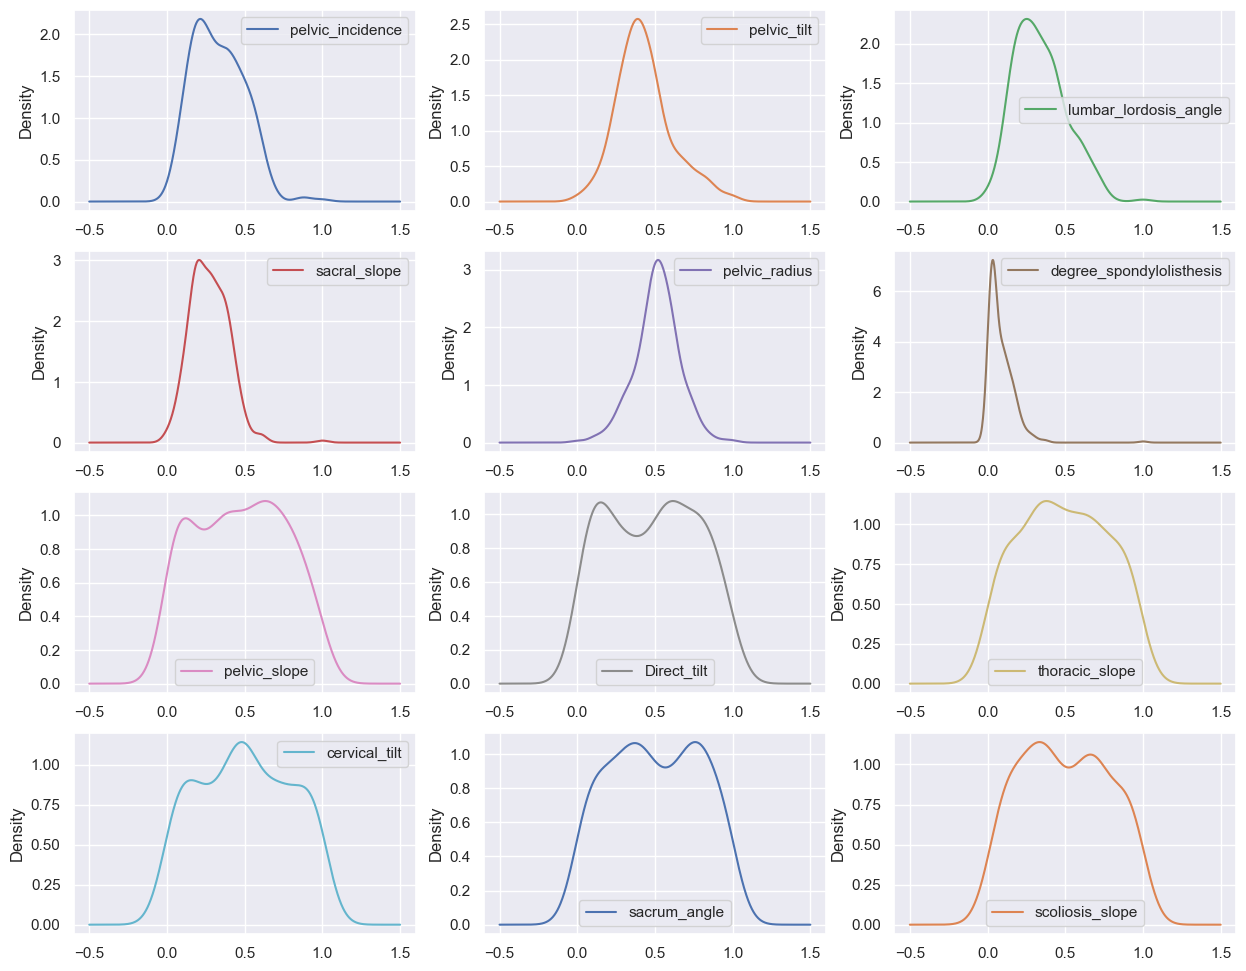

In [19]:
sns.set_theme(style='darkgrid')
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False ,figsize=(15,12))
plt.show()

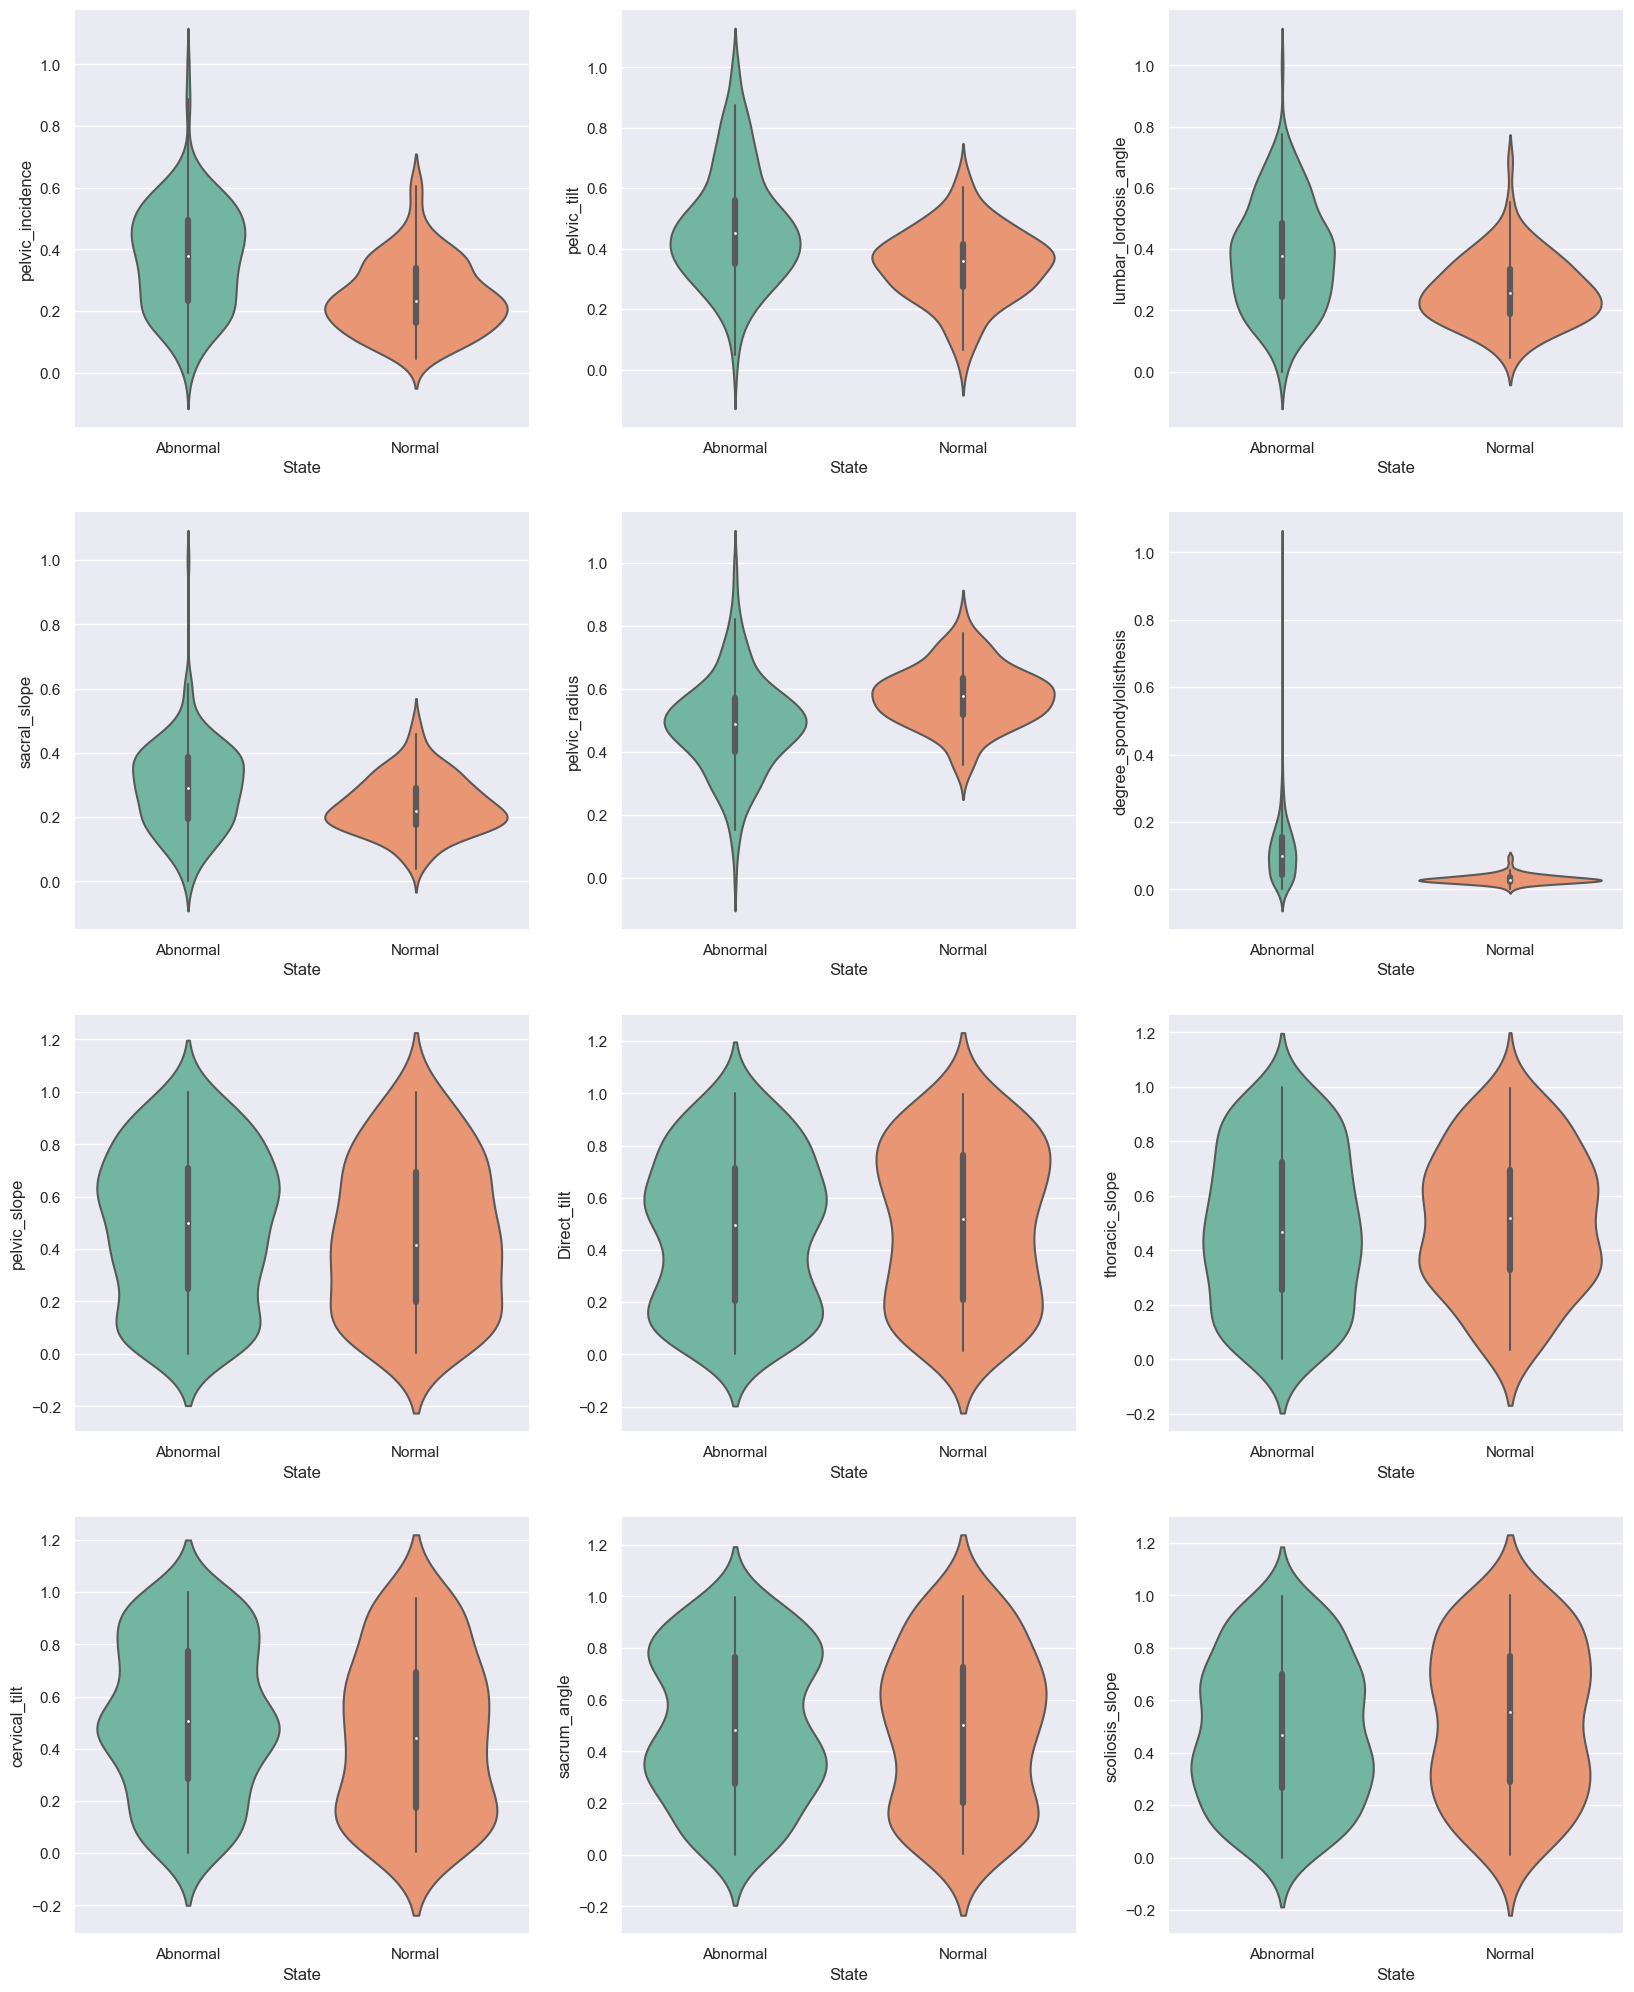

In [20]:
fig, ax = plt.subplots(4,3,figsize=(20,25))
sns.set_palette('Set2')

sns.violinplot( data=df ,ax=ax[0][0], x ='State', orient='v',y ='pelvic_incidence')
sns.violinplot( data=df ,ax=ax[0][1], x ='State', orient='v',y ='pelvic_tilt')
sns.violinplot( data=df ,ax=ax[0][2], x ='State', orient='v',y ='lumbar_lordosis_angle')
sns.violinplot( data=df ,ax=ax[1][0], x ='State', orient='v',y ='sacral_slope')
sns.violinplot( data=df ,ax=ax[1][1], x ='State', orient='v',y ='pelvic_radius')
sns.violinplot( data=df ,ax=ax[1][2], x ='State', orient='v',y ='degree_spondylolisthesis')  
sns.violinplot( data=df ,ax=ax[2][0], x ='State', orient='v',y ='pelvic_slope')
sns.violinplot( data=df ,ax=ax[2][1], x ='State', orient='v',y ='Direct_tilt')
sns.violinplot( data=df ,ax=ax[2][2], x ='State', orient='v',y ='thoracic_slope')
sns.violinplot( data=df ,ax=ax[3][0], x ='State', orient='v',y ='cervical_tilt')
sns.violinplot( data=df ,ax=ax[3][1], x ='State', orient='v',y ='sacrum_angle')
sns.violinplot( data=df ,ax=ax[3][2], x ='State', orient='v',y ='scoliosis_slope')

plt.show()

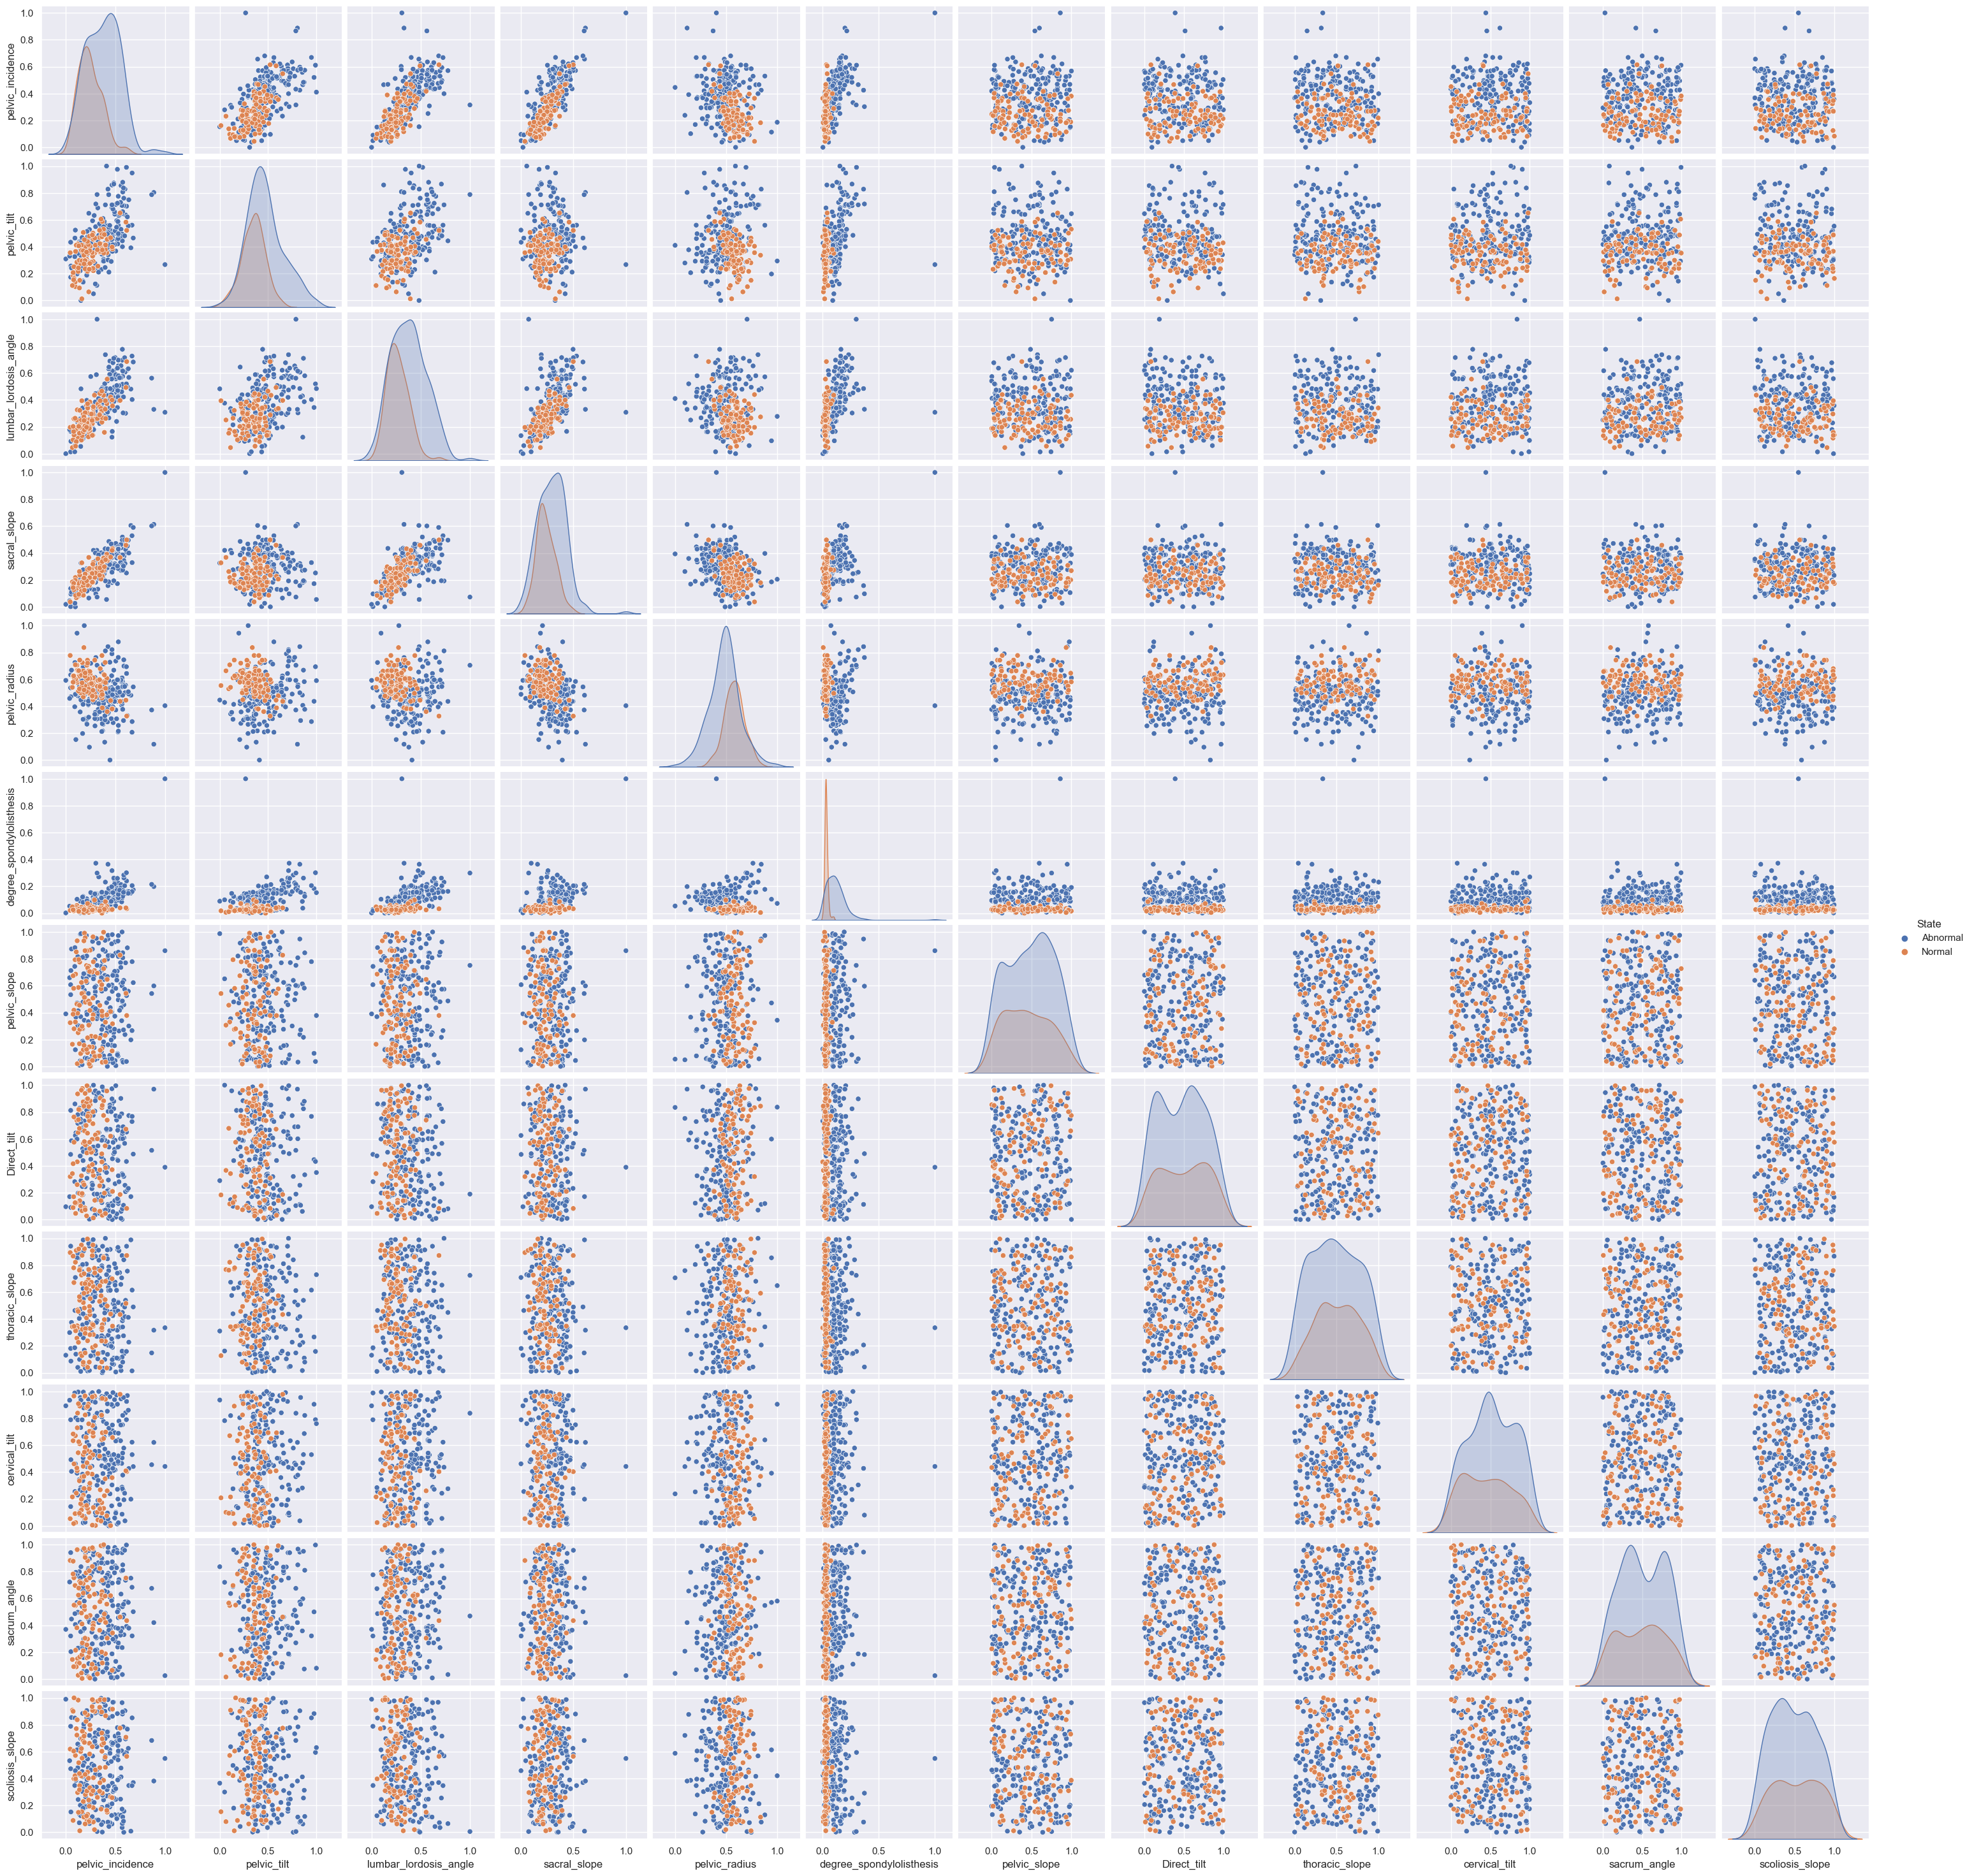

In [21]:
sns.set()
sns.pairplot(df,hue="State")
plt.show()

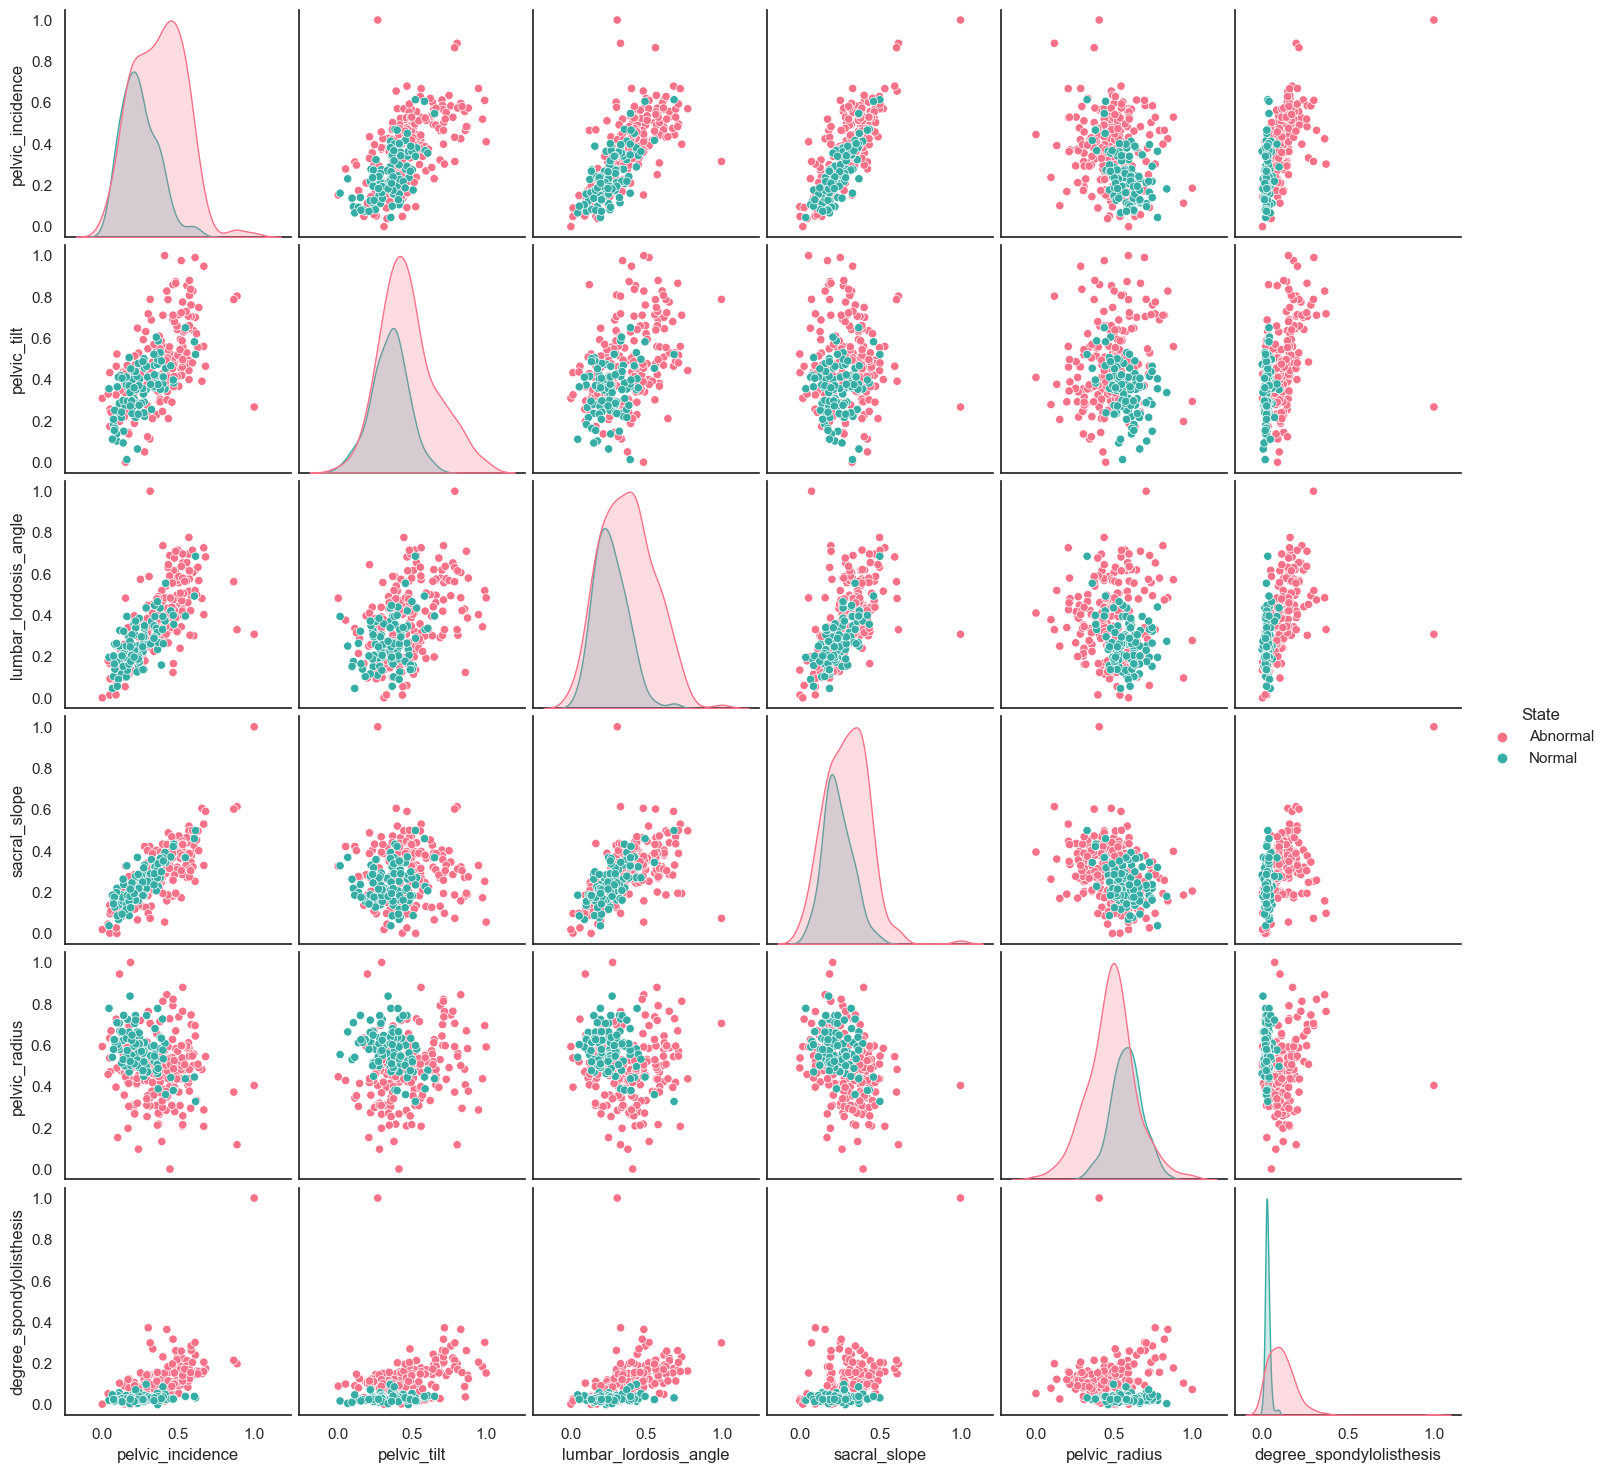

In [22]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius',
                 'degree_spondylolisthesis','State',]]

sns.set_style('white')
sns.pairplot(df_selected ,hue='State',palette='husl')
plt.show()

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\744227892.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')


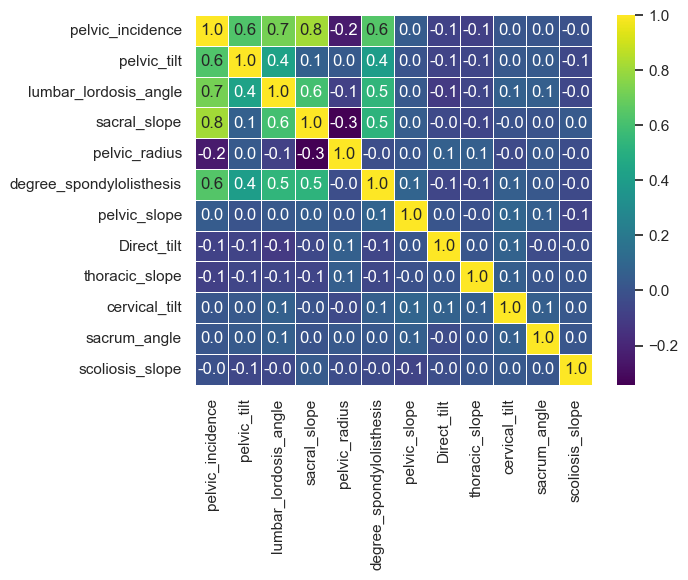

In [23]:
sns.heatmap(df.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')
plt.show()

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\2784746142.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_selected.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')


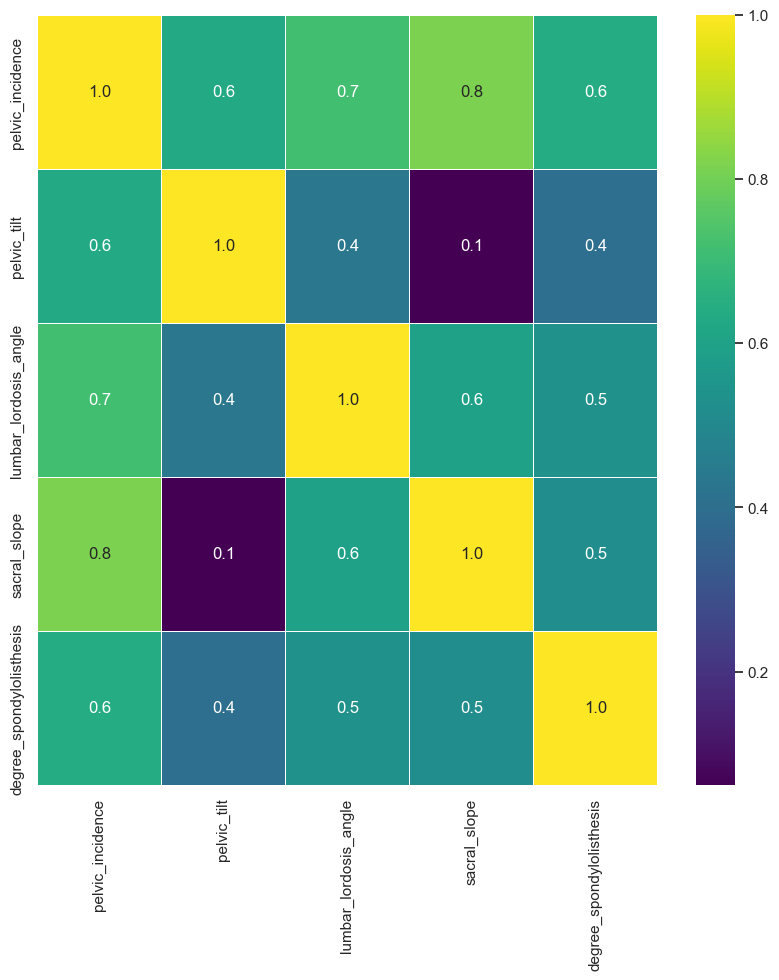

In [24]:
df_selected = df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',
                 'degree_spondylolisthesis','State',]]

plt.subplots(figsize=(10,10))
sns.heatmap(df_selected.corr(),cmap="viridis", annot=True , linewidths=.5, fmt= '.1f')
plt.show()

In [25]:
scaled_df.describe()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
count        310.000000   310.000000             310.000000    310.000000   
mean           0.331276     0.430419               0.339450      0.273794   
std            0.166237     0.178762               0.166043      0.124216   
min            0.000000     0.000000               0.000000      0.000000   
25%            0.195613     0.307608               0.205831      0.184895   
50%            0.313862     0.409251               0.318253      0.268714   
75%            0.450685     0.512180               0.438509      0.363946   
max            1.000000     1.000000               1.000000      1.000000   

       pelvic_radius  degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
count     310.000000                310.000000    310.000000   310.000000   
mean        0.514452                  0.086952      0.471832     0.481023   
std         0.143215                  0.087428      0.287048     0.290724   
min         0.000000                  0.000000      0.000000     0.000000   
25%         0.436900                  0.029474      0.222123     0.202827   
50%         0.518189                  0.053133      0.474855     0.500730   
75%         0.595613                  0.121847      0.704722     0.737865   
max         1.000000                  1.000000      1.000000     1.000000   

       thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
count      310.000000     310.000000    310.000000       310.000000  
mean         0.490527       0.500764      0.502473         0.499235  
std          0.276710       0.295518      0.289298         0.279926  
min          0.000000       0.000000      0.000000         0.000000  
25%          0.275105       0.256427      0.260246         0.272710  
50%          0.480266       0.502859      0.488992         0.480109  
75%          0.720461       0.749831      0.752264         0.722457  
max          1.000000       1.000000      1.000000         1.000000

In [26]:
df.describe(include =['O'])

State
count        310
unique         2
top     Abnormal
freq         210

In [27]:
SpineCondition_summary = df.groupby('State')
SpineCondition_summary.mean().reset_index()

State  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0  Abnormal          0.371743     0.470576               0.375197   
1    Normal          0.246295     0.346088               0.264381   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.291817       0.483879                  0.113677      0.482880   
1      0.235946       0.578655                  0.030830      0.448631   

   Direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.473094        0.481118       0.521132      0.507832         0.485867  
1     0.497676        0.510285       0.457989      0.491219         0.527307

In [28]:
SpineCondition_summary.var().reset_index()

State  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0  Abnormal          0.029016     0.035279               0.030985   
1    Normal          0.014229     0.014659               0.012238   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.018043       0.022962                  0.008974      0.082704   
1      0.007932       0.009397                  0.000216      0.081777   

   Direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.082787        0.081931       0.084644      0.081035         0.075270  
1     0.088621        0.065437       0.091158      0.089963         0.084496

In [29]:
SpineCondition_summary.std().reset_index()

State  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0  Abnormal          0.170342     0.187828               0.176025   
1    Normal          0.119285     0.121073               0.110624   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.134325       0.151531                  0.094731      0.287583   
1      0.089059       0.096939                  0.014682      0.285967   

   Direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.287727        0.286237       0.290936      0.284666         0.274353  
1     0.297692        0.255808       0.301924      0.299938         0.290681

In [30]:
SpineCondition_summary.median().reset_index()

State  pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  \
0  Abnormal          0.377360     0.452854               0.377207   
1    Normal          0.231229     0.357895               0.256294   

   sacral_slope  pelvic_radius  degree_spondylolisthesis  pelvic_slope  \
0      0.289394       0.490037                  0.100104      0.500258   
1      0.219250       0.578478                  0.028424      0.417345   

   Direct_tilt  thoracic_slope  cervical_tilt  sacrum_angle  scoliosis_slope  
0     0.495462        0.466560       0.504892      0.482621         0.468791  
1     0.517806        0.518627       0.439217      0.504329         0.555002

In [31]:
df.cov()

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\1545644723.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  0.027635     0.018698   
pelvic_tilt                       0.018698     0.031956   
lumbar_lordosis_angle             0.019799     0.012845   
sacral_slope                      0.016828     0.001384   
pelvic_radius                    -0.005892     0.000836   
degree_spondylolisthesis          0.009283     0.006218   
pelvic_slope                      0.002066     0.000454   
Direct_tilt                      -0.003790    -0.003748   
thoracic_slope                   -0.004128    -0.003136   
cervical_tilt                     0.000823     0.001528   
sacrum_angle                      0.000925     0.001699   
scoliosis_slope                  -0.000337    -0.002830   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.019799      0.016828      -0.005892   
pelvic_tilt                            0.012845      0.001384       0.000836   
lumbar_lordosis_angle                  0.027570      0.012342      -0.001911   
sacral_slope                           0.012342      0.015430      -0.006086   
pelvic_radius                         -0.001911     -0.006086       0.020511   
degree_spondylolisthesis               0.007747      0.005686      -0.000326   
pelvic_slope                           0.001405      0.001747       0.000648   
Direct_tilt                           -0.005452     -0.001694       0.002641   
thoracic_slope                        -0.002921     -0.002336       0.002397   
cervical_tilt                          0.003134     -0.000002      -0.001684   
sacrum_angle                           0.002748      0.000007       0.001232   
scoliosis_slope                       -0.002280      0.001142      -0.001208   

                          degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
pelvic_incidence                          0.009283      0.002066    -0.003790   
pelvic_tilt                               0.006218      0.000454    -0.003748   
lumbar_lordosis_angle                     0.007747      0.001405    -0.005452   
sacral_slope                              0.005686      0.001747    -0.001694   
pelvic_radius                            -0.000326      0.000648     0.002641   
degree_spondylolisthesis                  0.007644      0.002156    -0.001622   
pelvic_slope                              0.002156      0.082397     0.001059   
Direct_tilt                              -0.001622      0.001059     0.084521   
thoracic_slope                           -0.001386     -0.000935     0.000795   
cervical_tilt                             0.001462      0.007466     0.006249   
sacrum_angle                              0.000582      0.005044    -0.003148   
scoliosis_slope                          -0.001004     -0.005937    -0.001955   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.004128       0.000823      0.000925   
pelvic_tilt                    -0.003136       0.001528      0.001699   
lumbar_lordosis_angle          -0.002921       0.003134      0.002748   
sacral_slope                   -0.002336      -0.000002      0.000007   
pelvic_radius                   0.002397      -0.001684      0.001232   
degree_spondylolisthesis       -0.001386       0.001462      0.000582   
pelvic_slope                   -0.000935       0.007466      0.005044   
Direct_tilt                     0.000795       0.006249     -0.003148   
thoracic_slope                  0.076568       0.004289      0.000909   
cervical_tilt                   0.004289       0.087331      0.004912   
sacrum_angle                    0.000909       0.004912      0.083693   
scoliosis_slope                 0.000739       0.001757      0.001242   

                          scoliosis_slope  
pelvic_incidence                -0.000337  
pelvic_tilt                     -0.002830  
lumbar_lordosis_angle           -0.002280  
sacral_slope                     0.00

In [32]:
df.corr()

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282     0.432764   
sacral_slope                      0.814960     0.062345   
pelvic_radius                    -0.247467     0.032668   
degree_spondylolisthesis          0.638743     0.397862   
pelvic_slope                      0.043290     0.008852   
Direct_tilt                      -0.078411    -0.072119   
thoracic_slope                   -0.089740    -0.063394   
cervical_tilt                     0.016750     0.028931   
sacrum_angle                      0.019240     0.032859   
scoliosis_slope                  -0.007251    -0.056550   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960      -0.247467   
pelvic_tilt                            0.432764      0.062345       0.032668   
lumbar_lordosis_angle                  1.000000      0.598387      -0.080344   
sacral_slope                           0.598387      1.000000      -0.342128   
pelvic_radius                         -0.080344     -0.342128       1.000000   
degree_spondylolisthesis               0.533667      0.523557      -0.026065   
pelvic_slope                           0.029486      0.048988       0.015767   
Direct_tilt                           -0.112939     -0.046914       0.063433   
thoracic_slope                        -0.063582     -0.067968       0.060477   
cervical_tilt                          0.063875     -0.000063      -0.039800   
sacrum_angle                           0.057199      0.000207       0.029738   
scoliosis_slope                       -0.049054      0.032853      -0.030145   

                          degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
pelvic_incidence                          0.638743      0.043290    -0.078411   
pelvic_tilt                               0.397862      0.008852    -0.072119   
lumbar_lordosis_angle                     0.533667      0.029486    -0.112939   
sacral_slope                              0.523557      0.048988    -0.046914   
pelvic_radius                            -0.026065      0.015767     0.063433   
degree_spondylolisthesis                  1.000000      0.085925    -0.063812   
pelvic_slope                              0.085925      1.000000     0.012694   
Direct_tilt                              -0.063812      0.012694     1.000000   
thoracic_slope                           -0.057286     -0.011770     0.009887   
cervical_tilt                             0.056576      0.088017     0.072738   
sacrum_angle                              0.023021      0.060743    -0.037428   
scoliosis_slope                          -0.041023     -0.073893    -0.024021   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence               -0.089740       0.016750      0.019240   
pelvic_tilt                    -0.063394       0.028931      0.032859   
lumbar_lordosis_angle          -0.063582       0.063875      0.057199   
sacral_slope                   -0.067968      -0.000063      0.000207   
pelvic_radius                   0.060477      -0.039800      0.029738   
degree_spondylolisthesis       -0.057286       0.056576      0.023021   
pelvic_slope                   -0.011770       0.088017      0.060743   
Direct_tilt                     0.009887       0.072738     -0.037428   
thoracic_slope                  1.000000       0.052451      0.011354   
cervical_tilt                   0.052451       1.000000      0.057451   
sacrum_angle                    0.011354       0.057451      1.000000   
scoliosis_slope                 0.009541       0.021243      0.015337   

                          scoliosis_slope  
pelvic_incidence                -0.007251  
pelvic_tilt                     -0.056550  
lumbar_lordosis_angle           -0.049054  
sacral_slope                     0.03

In [33]:
correlation = df.corr()
relevant_features_correlation =  correlation[correlation >0.5]
relevant_features_correlation

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\812598180.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


pelvic_incidence  pelvic_tilt  \
pelvic_incidence                  1.000000     0.629199   
pelvic_tilt                       0.629199     1.000000   
lumbar_lordosis_angle             0.717282          NaN   
sacral_slope                      0.814960          NaN   
pelvic_radius                          NaN          NaN   
degree_spondylolisthesis          0.638743          NaN   
pelvic_slope                           NaN          NaN   
Direct_tilt                            NaN          NaN   
thoracic_slope                         NaN          NaN   
cervical_tilt                          NaN          NaN   
sacrum_angle                           NaN          NaN   
scoliosis_slope                        NaN          NaN   

                          lumbar_lordosis_angle  sacral_slope  pelvic_radius  \
pelvic_incidence                       0.717282      0.814960            NaN   
pelvic_tilt                                 NaN           NaN            NaN   
lumbar_lordosis_angle                  1.000000      0.598387            NaN   
sacral_slope                           0.598387      1.000000            NaN   
pelvic_radius                               NaN           NaN            1.0   
degree_spondylolisthesis               0.533667      0.523557            NaN   
pelvic_slope                                NaN           NaN            NaN   
Direct_tilt                                 NaN           NaN            NaN   
thoracic_slope                              NaN           NaN            NaN   
cervical_tilt                               NaN           NaN            NaN   
sacrum_angle                                NaN           NaN            NaN   
scoliosis_slope                             NaN           NaN            NaN   

                          degree_spondylolisthesis  pelvic_slope  Direct_tilt  \
pelvic_incidence                          0.638743           NaN          NaN   
pelvic_tilt                                    NaN           NaN          NaN   
lumbar_lordosis_angle                     0.533667           NaN          NaN   
sacral_slope                              0.523557           NaN          NaN   
pelvic_radius                                  NaN           NaN          NaN   
degree_spondylolisthesis                  1.000000           NaN          NaN   
pelvic_slope                                   NaN           1.0          NaN   
Direct_tilt                                    NaN           NaN          1.0   
thoracic_slope                                 NaN           NaN          NaN   
cervical_tilt                                  NaN           NaN          NaN   
sacrum_angle                                   NaN           NaN          NaN   
scoliosis_slope                                NaN           NaN          NaN   

                          thoracic_slope  cervical_tilt  sacrum_angle  \
pelvic_incidence                     NaN            NaN           NaN   
pelvic_tilt                          NaN            NaN           NaN   
lumbar_lordosis_angle                NaN            NaN           NaN   
sacral_slope                         NaN            NaN           NaN   
pelvic_radius                        NaN            NaN           NaN   
degree_spondylolisthesis             NaN            NaN           NaN   
pelvic_slope                         NaN            NaN           NaN   
Direct_tilt                          NaN            NaN           NaN   
thoracic_slope                       1.0            NaN           NaN   
cervical_tilt                        NaN            1.0           NaN   
sacrum_angle                         NaN            NaN           1.0   
scoliosis_slope                      NaN            NaN           NaN   

                          scoliosis_slope  
pelvic_incidence                      NaN  
pelvic_tilt                           NaN  
lumbar_lordosis_angle                 NaN  
sacral_slope                         

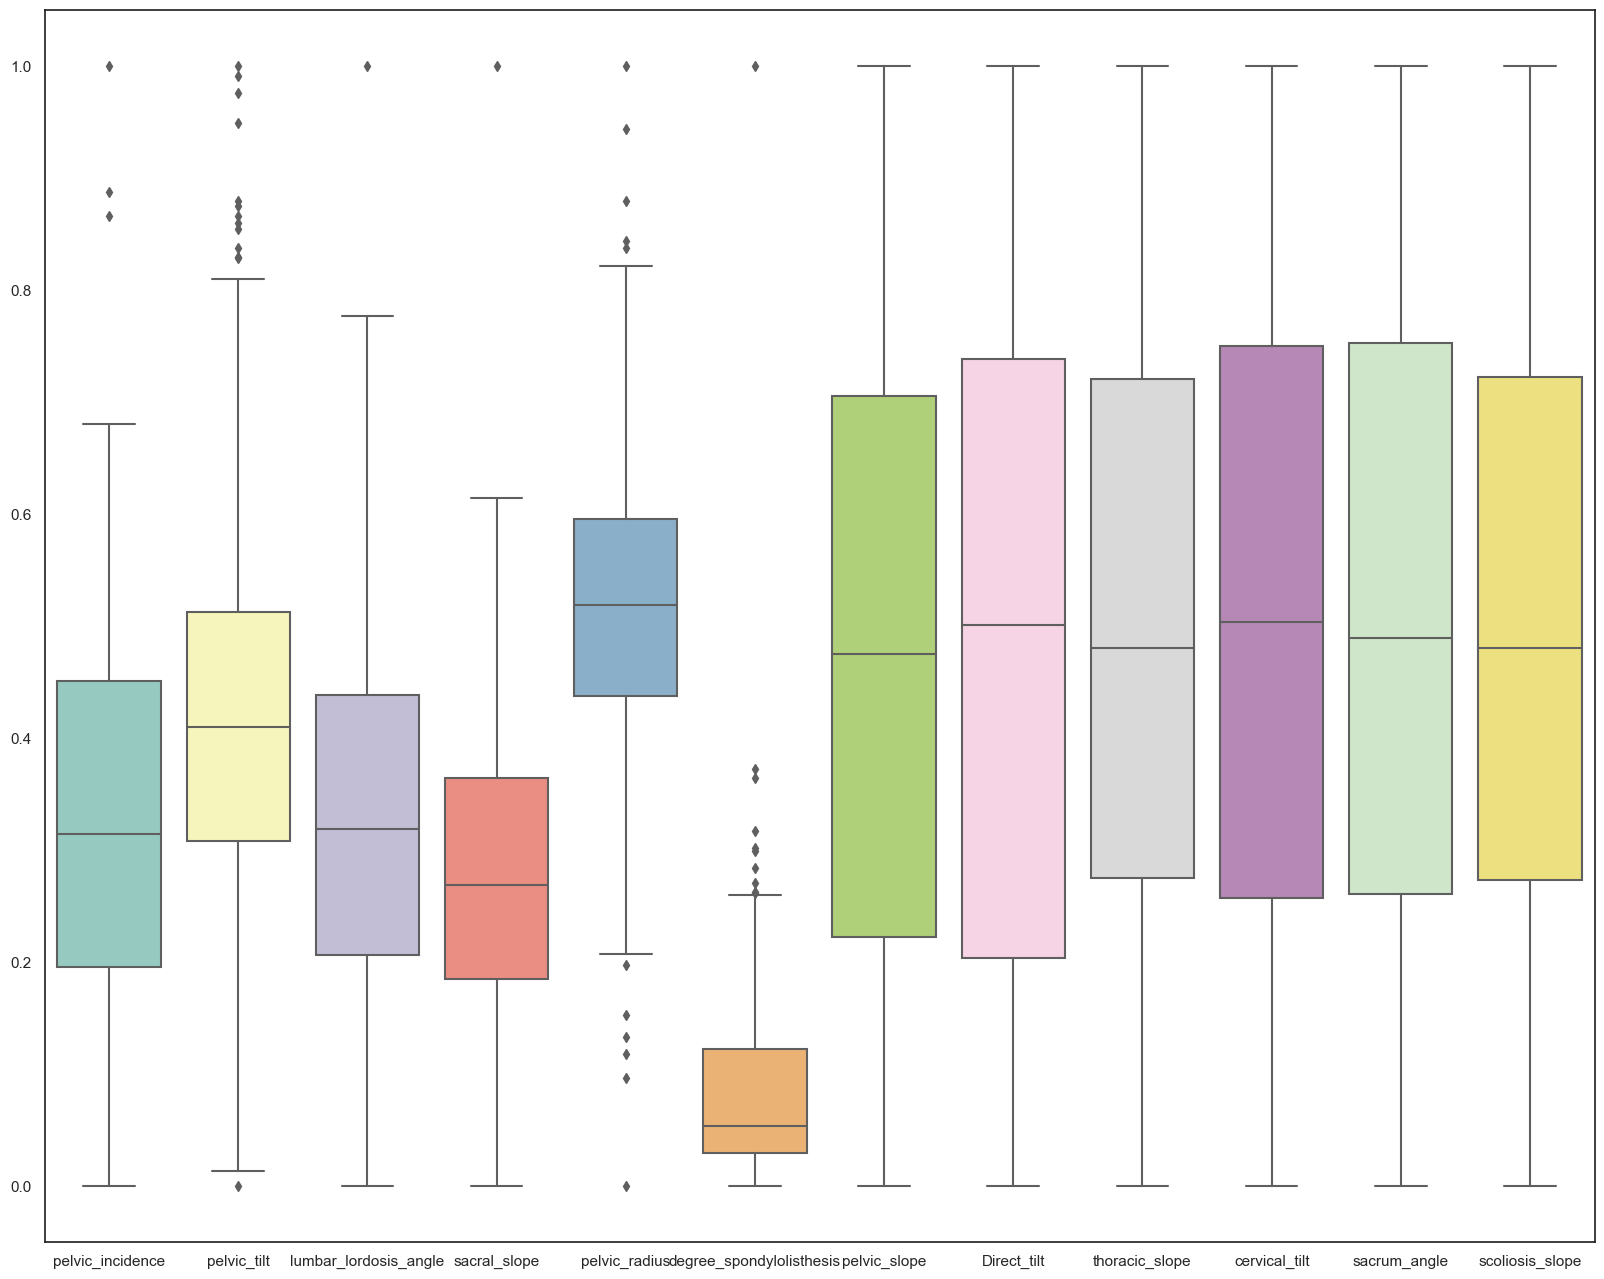

In [34]:
plt.figure(figsize=(20,16))
sns.boxplot(data=df,palette= "Set3")
plt.show()

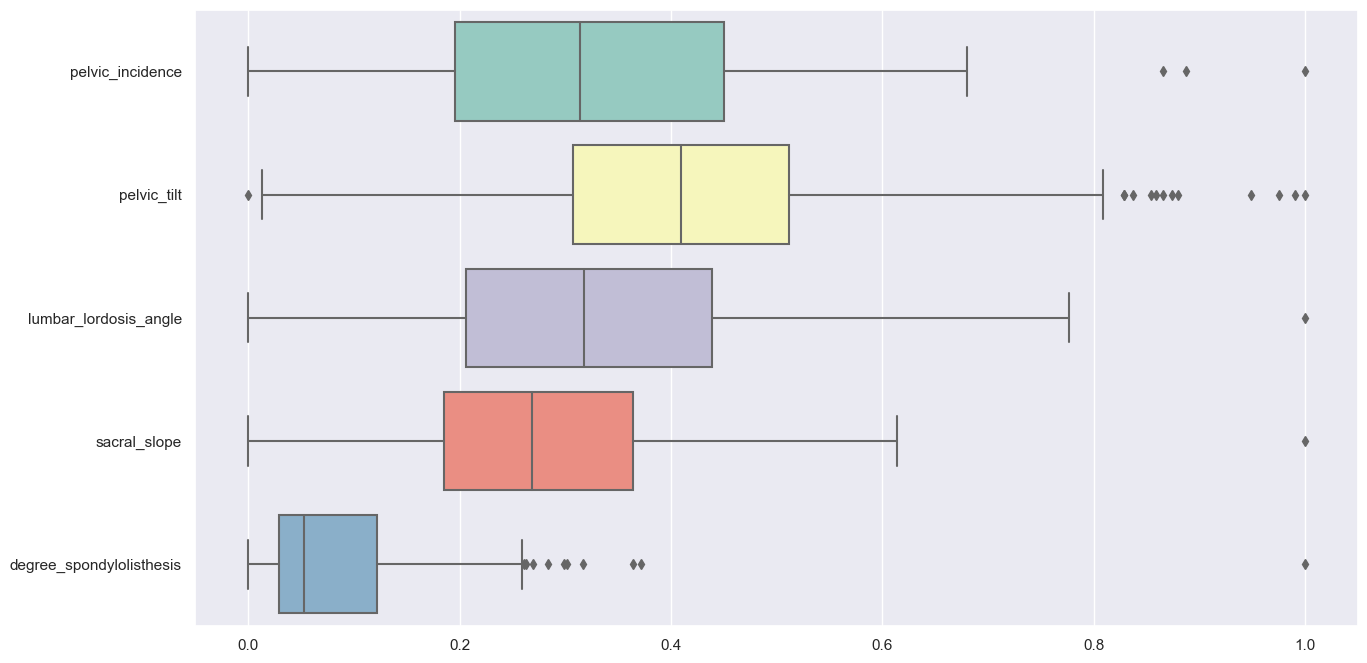

In [35]:
df0=df[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis',
        'State']]

plt.figure(figsize=(15,8))
sns.set()
sns.boxplot(data=df0,palette= "Set3",orient="h")
plt.show()

In [36]:
q1=df0.quantile(q=0.25)
q2=df0.quantile(q=0.50)
q3=df0.quantile(q=0.75)

iqr = q3 - q1
print(iqr)

pelvic_incidence            0.255072
pelvic_tilt                 0.204572
lumbar_lordosis_angle       0.232678
sacral_slope                0.179051
degree_spondylolisthesis    0.092373
dtype: float64


C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\2448820161.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=df0.quantile(q=0.25)
C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\2448820161.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q2=df0.quantile(q=0.50)
C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\2448820161.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=df0.quantile(q=0.75)


In [37]:
Upper_limit =q3 + (1.5 * iqr)
Lower_limit =q1 - (1.5 * iqr)

print(Upper_limit, '\n')
print(Lower_limit)

pelvic_incidence            0.833293
pelvic_tilt                 0.819038
lumbar_lordosis_angle       0.787526
sacral_slope                0.632523
degree_spondylolisthesis    0.260407
dtype: float64 

pelvic_incidence           -0.186994
pelvic_tilt                 0.000751
lumbar_lordosis_angle      -0.143186
sacral_slope               -0.083683
degree_spondylolisthesis   -0.109086
dtype: float64


Remove outliers

In [38]:
df1 = df0[(df0["pelvic_incidence"] > Lower_limit["pelvic_incidence"])
             & (df0["pelvic_incidence"] < Upper_limit["pelvic_incidence"])]

df0.shape[0] - df1.shape[0]

3

In [39]:
df2 = df1[(df1["pelvic_tilt"] > Lower_limit["pelvic_tilt"])
             & (df1["pelvic_tilt"] < Upper_limit["pelvic_tilt"])]

df1.shape[0] - df2.shape[0]

13

In [40]:
df3 = df2[(df2["lumbar_lordosis_angle"] > Lower_limit["lumbar_lordosis_angle"])
             & (df2["lumbar_lordosis_angle"] < Upper_limit["lumbar_lordosis_angle"])]

df2.shape[0] - df3.shape[0]

1

In [41]:
df4 = df3[(df3["sacral_slope"] > Lower_limit["sacral_slope"])
             & (df3["sacral_slope"] < Upper_limit["sacral_slope"])]

df3.shape[0] - df4.shape[0]

0

In [42]:
df_final = df4[(df4["degree_spondylolisthesis"] > Lower_limit["degree_spondylolisthesis"])
             & (df4["degree_spondylolisthesis"] < Upper_limit["degree_spondylolisthesis"])]

df4.shape[0] - df_final.shape[0]

5

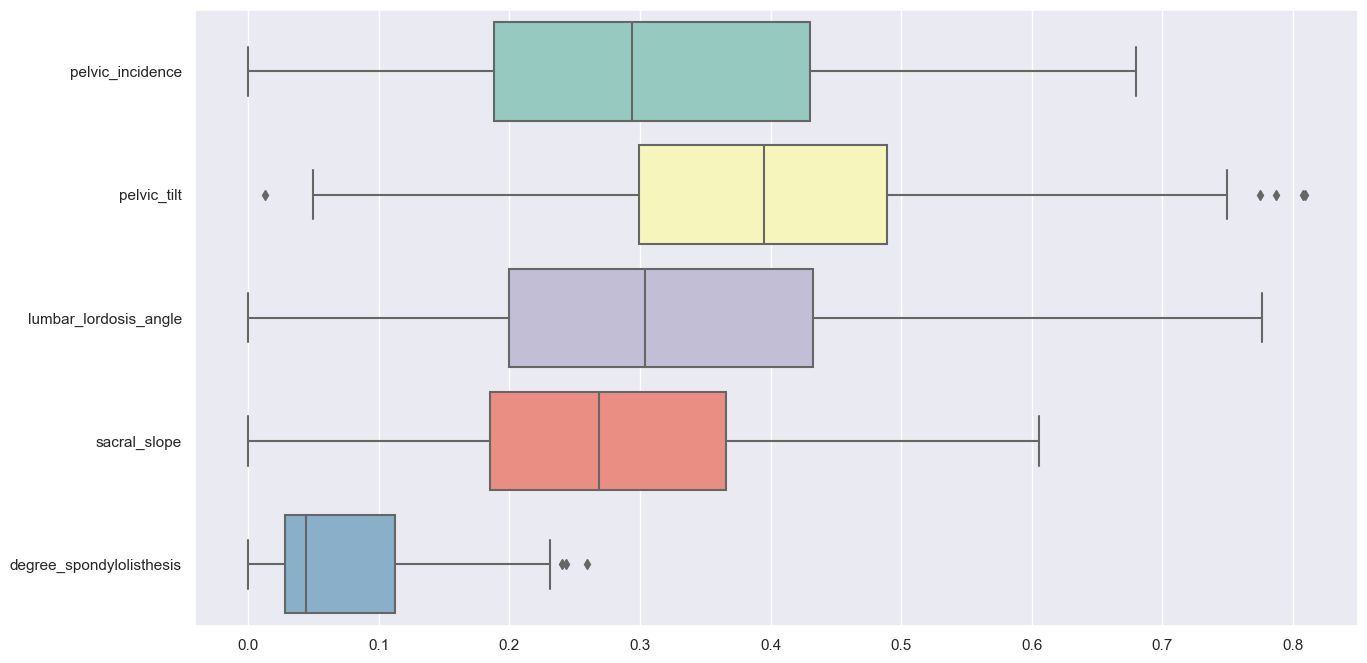

In [43]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_final, palette= "Set3",orient="h")
plt.show()

In [44]:
df_final.shape[0]

288

In [45]:
df_final['State'].value_counts()*100.0 /len(df)

Abnormal    60.645161
Normal      32.258065
Name: State, dtype: float64

In [46]:
df_final.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   
2          0.411666     0.513932               0.322995      0.307661   
3          0.416151     0.557414               0.271260      0.289436   
4          0.227272     0.289479               0.128129      0.247022   

   degree_spondylolisthesis     State  
0                  0.025148  Abnormal  
1                  0.036365  Abnormal  
2                  0.017523  Abnormal  
3                  0.051838  Abnormal  
4                  0.044173  Abnormal

convertion of categorical data to numerical data

In [47]:
df_final.select_dtypes(include=['object']).columns.tolist()

['State']

In [48]:
df_final['State'] =df_final['State'].map({'Abnormal': 0, 'Normal': 1}).astype(int)
df_final.head(2)

C:\Users\jangj\AppData\Local\Temp\ipykernel_21192\2816603795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['State'] =df_final['State'].map({'Abnormal': 0, 'Normal': 1}).astype(int)


pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.355688     0.519900               0.229180      0.250857   
1          0.124501     0.296783               0.098578      0.144629   

   degree_spondylolisthesis  State  
0                  0.025148      0  
1                  0.036365      0

Standard Scaler to transform distribution to a mean value of 0 and SD of 1

In [49]:
X=df_final[['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope','degree_spondylolisthesis']]
y=df_final['State']

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data = X_scaled_data, columns = X.columns)
X_scaled.head()

pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0          0.264522     0.789374              -0.623128     -0.180492   
1         -1.251939    -0.744388              -1.431298     -1.102302   
2          0.631712     0.748351              -0.042598      0.312428   
3          0.661128     1.047255              -0.362735      0.154280   
4         -0.577818    -0.794596              -1.248439     -0.213773   

   degree_spondylolisthesis  
0                 -0.848969  
1                 -0.656263  
2                 -0.979979  
3                 -0.390428  
4                 -0.522121

Below can start for model building

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier  

Support Vector Machine Model Building

In [52]:
X = X_scaled
y = df_final['State']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
print('No of rows in X = ',X.shape[0])
print('No of rows in X_train = ',X_train.shape[0])
print('No of rows in X_test = ',X_test.shape[0])
print('-------------------------------')
print('No of rows in y = ',y.shape[0])
print('No of rows in y_train = ',y_train.shape[0])
print('No of rows in y_test = ',y_test.shape[0])

No of rows in X =  288
No of rows in X_train =  230
No of rows in X_test =  58
-------------------------------
No of rows in y =  288
No of rows in y_train =  230
No of rows in y_test =  58


In [55]:
dtree = DecisionTreeClassifier()

dtree_model= dtree.fit(X_train,y_train)

dtree_y_pred = dtree.predict(X_test)

dtree_train_score = dtree_model.score(X_train, y_train)
dtree_test_score  = dtree_model.score(X_test, y_test)

print("DecisionTreeClassifier :- ")
print ("Training Score: {}\nTest Score: {}" .format(dtree_train_score, dtree_test_score))

DecisionTreeClassifier :- 
Training Score: 1.0
Test Score: 0.7586206896551724


In [56]:
svc_classifier = SVC(kernel='linear', random_state=1)

svcModel = svc_classifier.fit(X_train, y_train)

svc_y_pred = svcModel.predict(X_test)

svc_train_score = svcModel.score(X_train, y_train)
svc_test_score  = svcModel.score(X_test, y_test)

print("SVM Model:")
print ("Training Score: {}\nTest Score: {}" .format(svc_train_score, svc_test_score))

SVM Model:
Training Score: 0.8260869565217391
Test Score: 0.8448275862068966


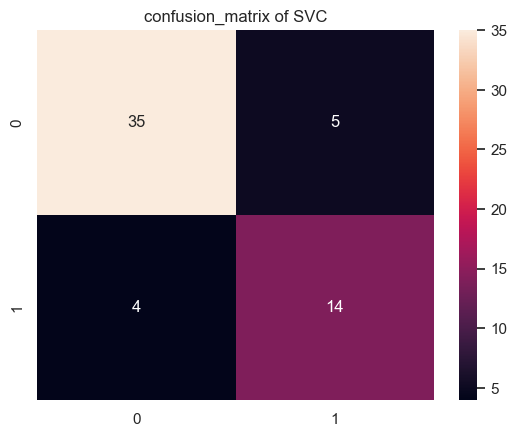

In [57]:
from sklearn.metrics import confusion_matrix

plt.title('confusion_matrix of SVC')
sns.heatmap(confusion_matrix(y_test,svc_y_pred),annot=True,fmt="d")
plt.show()

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,svc_y_pred))

from sklearn import metrics
metrics.accuracy_score(y_test, svc_y_pred)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89        40
           1       0.74      0.78      0.76        18

    accuracy                           0.84        58
   macro avg       0.82      0.83      0.82        58
weighted avg       0.85      0.84      0.85        58



0.8448275862068966

Summary of all model accuracy

In [80]:
models=pd.DataFrame({'Model':['SVC',], # add remaining 2 algorithm into this tuple list after ","
                    'Accuracy': [svc_test_score
                                    *100,] # add remaining 2 algorithm test score this tuple list after ","
                                    })
models.sort_values(by='Accuracy', ascending=False)

Model   Accuracy
0   SVC  84.482759